In [1]:
import pandas as pd 
import numpy as nm
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt

In [2]:
!pip show scikit-learn



Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\ProgramData\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex


In [3]:
data_true = pd.read_csv("True.csv")
data_fake = pd.read_csv ("fake.csv")


In [4]:
data_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
data_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
data_true.shape, data_fake.shape

((21417, 4), (23481, 4))

In [7]:
data_true["class"]=1
data_fake["class"]=0 

In [8]:
data_true_manual_testing = data_true.iloc[:10]
for i in range(21416, 21406, -1):
    data_true.drop([i], axis=0, inplace=True)
                   
data_fake_manual_testing = data_fake.iloc[:10]
for i in range(21416, 21406, -1):
    data_fake.drop([i], axis=0, inplace=True)

                                      
                   
                   
                   

In [9]:
data_manual_testing =pd.concat([data_fake_manual_testing, data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv")


In [10]:
data_merag = pd.concat([data_fake, data_true],axis =0)
data_merag.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4449
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


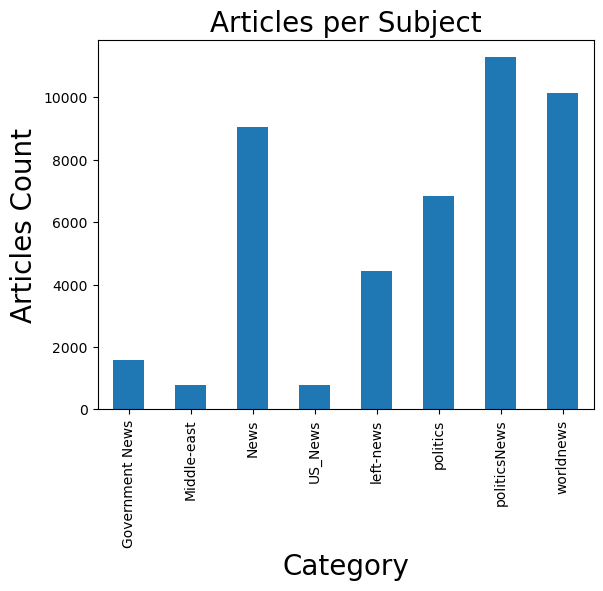

In [11]:
import matplotlib.pyplot as plt



print(data_merag.groupby(["subject"])['text'].count())


data_merag.groupby(["subject"])['text'].count().plot(kind="bar")
plt.title("Articles per Subject", size=20)
plt.xlabel("Category", size=20)  
plt.ylabel("Articles Count", size=20) 
plt.show()



class
0    23471
1    21407
Name: text, dtype: int64
0 =fake new
1 = True news
Axes(0.22375,0.11;0.5775x0.77)


Text(0.5, 1.0, 'fake new and ture news')

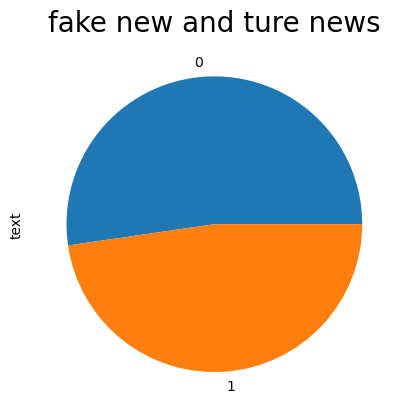

In [12]:
print(data_merag.groupby(['class'])['text'].count())
print("0 =fake new\n1 = True news")
print(data_merag.groupby(['class'])['text'].count().plot(kind="pie"))
plt.title("fake new and ture news",size = 20)



In [13]:
data = data_merag.drop(["title", "subject", "date"], axis=1)



In [14]:
data.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [15]:
data=data.sample(frac=1)

In [16]:
data.head(10)

,text,class
12215,GENEVA (Reuters) - The United Nations human ri...,1
20311,Assimilate or go home In the latest move to de...,0
19150,"MARAWI CITY, Philippines (Reuters) - With a gr...",1
18242,WASHINGTON (Reuters) - Leaders of the U.S. Sen...,1
14701,WASHINGTON (Reuters) - U.S. President Donald T...,1
15395,Maybe Florida isn t as pro-amnesty as Jeb Bush...,0
9047,WASHINGTON (Reuters) - Democrat Hillary Clinto...,1
747,Donald Trump is desperate to distract everyone...,0
11187,Everyone knows not to talk to her in the Whit...,0
13879,BERLIN (Reuters) - Members of Germany s Social...,1


In [17]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [18]:
import re
import string

def filteing(data):
    text = data.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\s+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  
    text = re.sub(r'\w*\d\w*', '', text)
    return text


In [19]:
data["text"]=data["text"].apply(filteing)

In [20]:
data.head()

,text,class
12215,geneva reuters the united nations human right...,1
20311,assimilate or go home in the latest move to de...,0
19150,marawi city philippines reuters with a grimac...,1
18242,washington reuters leaders of the us senate i...,1
14701,washington reuters us president donald trump ...,1


In [21]:
x =data['text']
y=data ['class']

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer



In [24]:
vector = TfidfVectorizer()
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)

In [25]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train, y_train)


LogisticRegression()

In [26]:
accuracy = LR.score(xv_test, y_test).round(2)
print("Accuracy:", accuracy)


Accuracy: 0.99


In [27]:

pred_LR = LR.predict(xv_test)


In [28]:
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5829
           1       0.98      0.99      0.98      5391

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



Confusion Matrix:
 [[5737   92]
 [  73 5318]]


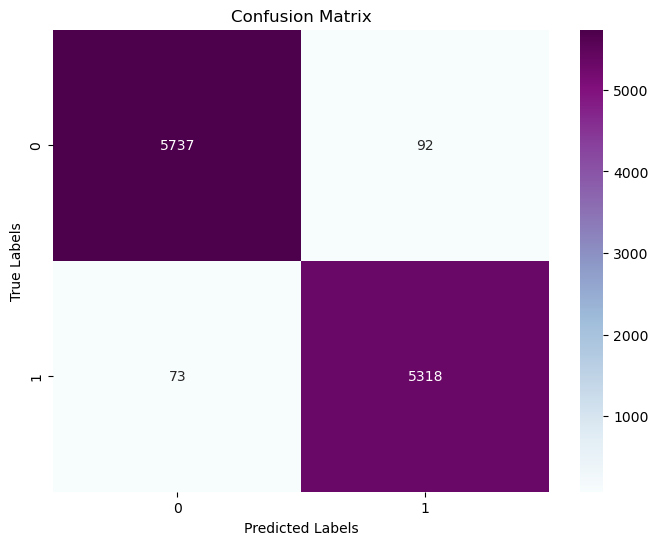

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



cm = confusion_matrix(y_test, pred_LR)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, cmap="BuPu", annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [30]:
from sklearn.tree import DecisionTreeClassifier


In [31]:

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)


DecisionTreeClassifier()

In [32]:
DT.score(xv_test,y_test).round(2)

1.0

In [33]:
pred_DT =DT.predict(xv_test)

In [34]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5829
           1       1.00      1.00      1.00      5391

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



[[5812   17]
 [  19 5372]]


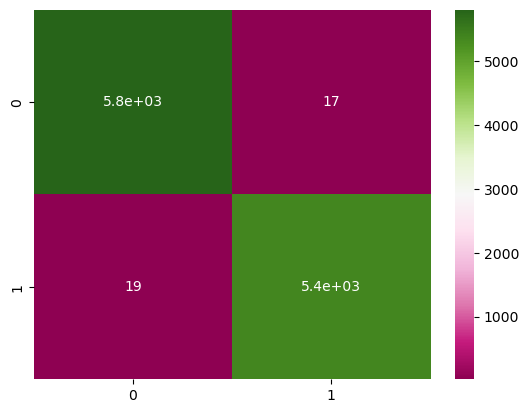

In [35]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, pred_DT)


print(cm)

sns.heatmap(cm, cmap="PiYG", annot=True)

plt.show()  


In [36]:
from sklearn.ensemble import GradientBoostingClassifier


In [37]:
GBC =GradientBoostingClassifier(random_state=0)
GBC.fit(xv_test,y_test)

GradientBoostingClassifier(random_state=0)

In [38]:
GBC.score(xv_test,y_test)

0.9983065953654189

In [39]:
pred_GBC= GBC.predict(xv_test)

In [40]:
print(classification_report(y_test,pred_GBC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5829
           1       1.00      1.00      1.00      5391

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



[[5814   15]
 [   4 5387]]


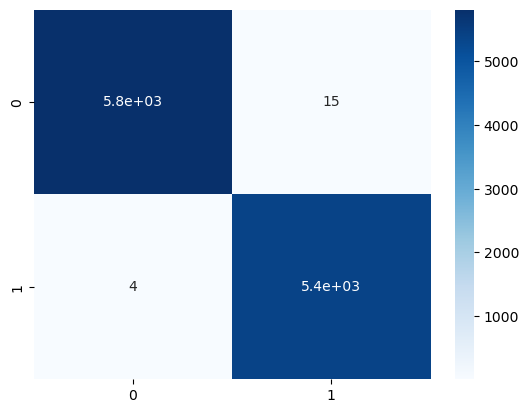

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



cm = confusion_matrix(y_test, pred_GBC)

print(cm)

sns.heatmap(cm, cmap="Blues", annot=True)

plt.show()  


In [42]:
from sklearn.ensemble import RandomForestClassifier


In [43]:
RFC =RandomForestClassifier(random_state=0)
RFC.fit(xv_test,y_test)

RandomForestClassifier(random_state=0)

In [44]:
RFC.score(xv_test,y_test)

1.0

In [45]:
pred_RFC= RFC.predict(xv_test)

In [46]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5829
           1       1.00      1.00      1.00      5391

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



[[5829    0]
 [   0 5391]]


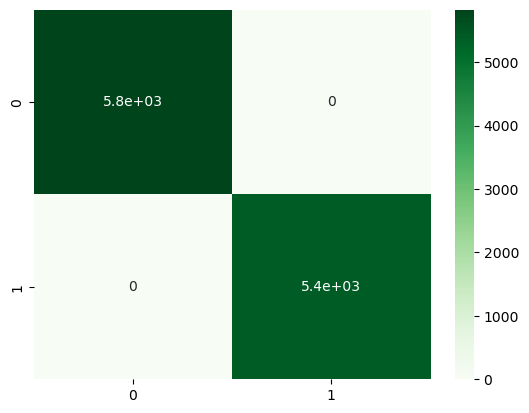

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



cm = confusion_matrix(y_test, pred_RFC)

print(cm)

sns.heatmap(cm, cmap="Greens", annot=True)

plt.show()  

In [50]:
def output_label(n):
    if n == 0:
        return "FAKE News"
    elif n == 1:
        return "TRUE News"
    
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)  # Corrected pd.DataFrame
    new_def_test['text'] = new_def_test['text'].apply(filteing)
    new_x_test = new_def_test['text']
    new_xv_test = vector.transform(new_x_test)
    
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    
    lr_output = output_label(pred_LR[0])
    dt_output = output_label(pred_DT[0])
    gbc_output = output_label(pred_GBC[0])
    rfc_output = output_label(pred_RFC[0])
    
    return f"LR prediction: {lr_output}\nDT prediction: {dt_output}\nGBC prediction: {gbc_output}\nRFC prediction: {rfc_output}"



In [51]:
news = str(input())
manual_testing(news)


Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this d

'LR prediction: FAKE News\nDT prediction: FAKE News\nGBC prediction: FAKE News\nRFC prediction: FAKE News'

In [53]:
news = str(input())
manual_testing(news)

"As U.S. budget fight looms, Republicans flip their fiscal script","WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for n

'LR prediction: TRUE News\nDT prediction: TRUE News\nGBC prediction: TRUE News\nRFC prediction: TRUE News'